# Week 1 Group Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [1]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [2]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

### Getting the Participant Lists and Metadata

In [17]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

data.head()
# data.info()
data['atlas'].unique()

# len(np.unique(data['atlas']))

data[data['atlas'] == 'aparc.DKTatlas']


Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,sub-1000393599,NaN,aparc.DKTatlas,rh,superiorparietal,7263,4596,12019,2.381,0.436,...,5.0650,-1.5989,46.3897,47.9886,4.0126,2.9146,0.1855,2.4586,3.3606,0.9021
58,sub-1000393599,NaN,aparc.DKTatlas,rh,superiortemporal,7558,5212,19435,3.113,0.690,...,5.5370,-41.1954,52.1851,93.3805,3.7939,3.9561,0.7072,2.2721,5.0449,2.7727
59,sub-1000393599,NaN,aparc.DKTatlas,rh,supramarginal,5561,3715,11261,2.792,0.478,...,4.6625,-5.9331,35.1747,41.1078,4.5279,3.6021,0.3570,3.1115,5.1221,2.0107
60,sub-1000393599,NaN,aparc.DKTatlas,rh,transversetemporal,540,345,1072,2.658,0.391,...,4.6227,2.4911,32.1626,29.6715,3.4117,4.6751,0.2283,4.2176,5.0039,0.7863


In [16]:
data.head()

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800


We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [26]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
print(all_data)

all_data['parent_1_education'].unique()
all_data['parent_2_education'].unique()


import numpy as np

education_map = {
    'Complete primary': 1,
    'Complete secondary': 2,
    'Complete tertiary': 3,
    'No/incomplete primary': np.nan
}

all_data['parent_1_education_num'] = all_data['parent_1_education'].map(education_map)
all_data['parent_2_education_num'] = all_data['parent_2_education'].map(education_map)

# Check result
print(all_data[['parent_1_education', 'parent_1_education_num']].drop_duplicates())
print(all_data[['parent_2_education', 'parent_2_education_num']].drop_duplicates())

# This will create two new columns (parent_1_education_num and parent_2_education_num) that are numeric and ready for modeling, with 'No/incomplete primary' treated as missing.

     participant_id study study_site session_id  wave        age     sex  \
0        1000393599   PNC       PNC1       PNC1     1  15.583333    Male   
1        1001970838   PNC       PNC1       PNC1     1  17.833333    Male   
2        1007995238   PNC       PNC1       PNC1     1  13.750000  Female   
3        1011497669   PNC       PNC1       PNC1     1  16.666667    Male   
4        1017092387   PNC       PNC1       PNC1     1  18.666667  Female   
..              ...   ...        ...        ...   ...        ...     ...   
529       969649154   PNC       PNC1       PNC1     1  12.333333    Male   
530       970890500   PNC       PNC1       PNC1     1  18.166667  Female   
531       975856179   PNC       PNC1       PNC1     1  11.000000    Male   
532       984757368   PNC       PNC1       PNC1     1  13.416667    Male   
533       987544292   PNC       PNC1       PNC1     1  18.416667  Female   

      race               ethnicity    bmi handedness participant_education  \
0    Blac

## Project Goal: Predict the `p_factor`

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

### Step 1. Collect Data

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [5]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [6]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

In [7]:
row_mask = (data['StructName'] == 'Brodmann.1')
data[row_mask]

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
1876,sub-1000393599,NaN,PALS_B12_Brodmann,lh,Brodmann.1,2851,1753,4067,2.069,0.576,...,5.2783,-7.2181,32.3884,39.6064,3.0996,3.4915,0.6993,2.4164,5.3746,2.9581
1919,sub-1000393599,NaN,PALS_B12_Brodmann,rh,Brodmann.1,2379,1537,3766,2.008,0.586,...,4.8646,-6.7201,38.8376,45.5577,3.3062,3.2389,0.5011,2.4060,4.8009,2.3949


Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

In [8]:
ba1_surfareas = data.loc[row_mask, 'SurfArea']
ba1_surfarea = sum(ba1_surfareas)

# Show the bilateral surface area for this participant (in square mm):
ba1_surfarea

3290

Based on the above workflow, we can now write a function that extracts the BA1
surface area for a participant.

In [9]:
def load_ba1_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data['StructName'] == 'Brodmann.1')
    # Then extract and sum the surface areas:
    ba1_surfareas = data.loc[row_mask, 'SurfArea']
    ba1_surfarea = sum(ba1_surfareas)
    # And return this value:
    return ba1_surfarea

Let's test this function:

In [10]:
load_ba1_surfarea(example_participant_id)

3290

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

In [11]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = {
    'participant_id': [],
    'ba1_surface_area': [],
    'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:
    try:
        surf_area = load_ba1_surfarea(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        surf_area = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['ba1_surface_area'].append(surf_area)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading surface areas...


IntProgress(value=0, max=1601)

,participant_id,ba1_surface_area,p_factor
0,1000393599,3290.0,0.589907
1,1001970838,2629.0,-0.659061
2,1007995238,2921.0,-1.608375
3,1011497669,3184.0,-1.233807
4,1017092387,2973.0,-0.923100
...,...,...,...
1596,969649154,3086.0,NaN
1597,970890500,2235.0,NaN
1598,975856179,2863.0,NaN
1599,984757368,2877.0,NaN


### Step 2. Train the Linear Regression

In [68]:
import pandas as pd
features = pd.read_csv('derivatives/features.csv')
features.query("is_train")
train_vars = features.query("is_train")
import numpy as np

In [70]:
train = features.query("is_train").copy()
train = train.assign(sex_num = lambda df_: df_.sex.astype('category').cat.codes)


In [71]:
selected_features2 = ['internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'age','attention_mcelroy_harmonized_all_samples','frontalpole']


selected_features = ['caudalanteriorcingulate', 'caudalmiddlefrontal', 
       'frontalpole', 'lateraloccipital',
       'lateralorbitofrontal','medialorbitofrontal',
        'parsopercularis',
       'parsorbitalis', 'parstriangularis', 
       'posteriorcingulate', 
       'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal', 'parent_1_education_num','parent_2_education_num']

In [41]:
print(train_vars.columns.tolist())
print(test.columns.tolist())



['bankssts', 'caudalanteriorcingulate', 'caudalmiddlefrontal', 'cuneus', 'entorhinal', 'frontalpole', 'fusiform', 'inferiorparietal', 'inferiortemporal', 'insula', 'isthmuscingulate', 'lateraloccipital', 'lateralorbitofrontal', 'lingual', 'medialorbitofrontal', 'middletemporal', 'paracentral', 'parahippocampal', 'parsopercularis', 'parsorbitalis', 'parstriangularis', 'pericalcarine', 'postcentral', 'posteriorcingulate', 'precentral', 'precuneus', 'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal', 'superiorparietal', 'superiortemporal', 'supramarginal', 'temporalpole', 'transversetemporal', 'subject_id', 'study', 'study_site', 'session_id', 'wave', 'age', 'sex', 'race', 'ethnicity', 'bmi', 'handedness', 'participant_education', 'p_factor', 'internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'attention_mcelroy_harmonized_all_samples', 'cubids_acquisition_group', 'is_train', 'parent_1_education_num', 'parent_2_education_num']

In [73]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.

train_matrix = train.loc[:, ['frontalpole','internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'attention_mcelroy_harmonized_all_samples', 'age', 'p_factor']].values

# train_matrix = train_vars.loc[:, ['caudalanteriorcingulate', 'caudalmiddlefrontal', 
#        'frontalpole', 'lateraloccipital',
#        'lateralorbitofrontal','medialorbitofrontal',
#         'parsopercularis',
#        'parsorbitalis', 'parstriangularis', 
#        'posteriorcingulate', 
#        'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal', 'parent_1_education_num','parent_2_education_num','p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :-1], train_matrix[:, -1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: -0.7149512966498675
  Slope: [-0.00036766  0.15250152  0.16849368  0.11392531  0.05229114]


To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

### Step 3. Predict the `p_factor` of the Test Data

In [74]:
# Clean column names in the DataFrame
test.columns = test.columns.astype(str).str.strip()

# Clean selected_features list
selected_features = [str(col).strip() for col in selected_features2]

missing = [col for col in selected_features if col not in test.columns]
print("Missing columns:", missing)

test = features.query("not is_train")
test_matrix = test.loc[:, selected_features].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]
# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)
# Display the predictions:
p_factor_predictions


# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
# test_matrix = test_vars.loc[:, ['ba1_surface_area']].values
# test_okrows = np.all(~np.isnan(test_matrix), axis=1)
# test_matrix = test_matrix[test_okrows]

# # Apply the model:
# p_factor_predictions = lreg.predict(test_matrix)

# # Display the predictions:
# p_factor_predictions

Missing columns: []


array([69.57347245, 74.88018605, 46.46803499, 57.13339352, 76.75183519,
       49.6485439 , 64.043459  , 63.82803865, 69.17884072, 70.88778485,
       65.05151253, 70.46007151, 59.21857687, 73.26974469, 70.77229905,
       59.31732696, 54.8213351 , 55.53133716, 90.28759293, 56.17384039,
       65.01168976, 53.97317961, 71.9994143 , 64.79837661, 59.40546245,
       58.39495984, 55.6527439 , 43.05088848, 59.41514015, 77.23831165,
       61.4512637 , 69.70401138, 57.65180901, 93.1711083 , 63.43823401,
       60.15757943, 62.13527673, 57.46027426, 56.76502075, 67.88502223,
       69.29509556, 66.11337503, 62.02260946, 67.49108548, 52.25394073,
       69.1065971 , 61.7618632 , 65.44673281, 67.02684172, 80.00580764,
       83.14425044, 52.5002623 , 64.69779629, 74.8157223 , 57.77287619,
       55.62653158, 57.07216286, 57.8146298 , 48.0620916 , 72.35974732,
       74.25518328, 98.68725366, 65.99247041, 53.63348243, 60.99429724,
       70.89020895, 69.00074653, 52.209463  , 76.06583844, 64.29

In [79]:
# diego's way

all_features = pd.read_csv('derivatives/features.csv')
train = all_features.query("is_train")
# select whatever features you want
# selected_features = ['age', 'frontalpole', 'internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'attention_mcelroy_harmonized_all_samples']
selected_features2 = ['internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'age','attention_mcelroy_harmonized_all_samples','frontalpole']


# make sure p_factor is the last columns
train_vars = train[selected_features+['p_factor']]
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression
# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]
# Train the regression using the training matrix:
lreg = LinearRegression()
## the first argument should be a matrix with all independent variables, the second argument is just the dependent variable (p_factor)
lreg.fit(train_matrix[:, :-1], train_matrix[:, -1])
# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: -0.7149512966498999
  Slope: [ 0.05229114 -0.00036766  0.15250152  0.16849368  0.11392531]


In [80]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test = all_features.query("not is_train")
test_matrix = test.loc[:, selected_features].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]
# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)
# Display the predictions:
p_factor_predictions

array([-0.38461222, -0.94392849,  0.21994017, -0.46968363,  0.00757597,
       -0.44817508, -0.47790885, -0.30571851, -0.82562106, -0.29343789,
       -0.27914072,  0.02508272, -0.27769156, -0.60887446, -0.64374096,
       -0.23008423, -0.26056984, -0.78759703, -0.83331556, -0.42224003,
       -0.66745882,  0.15595726, -0.9122643 , -0.03759466,  0.07169946,
       -0.16254976, -0.37337543, -0.42630096, -0.39384009, -0.91916705,
       -0.2464824 , -0.26090352, -0.77457409, -0.8277539 , -0.23214714,
       -0.37398957, -0.74631555,  0.02148964, -0.65366891, -0.52687222,
       -0.47767855, -0.36310242, -0.3462985 , -0.69755502, -0.52264605,
       -0.53520232, -0.33108239, -0.16755268, -0.41580076, -0.77015153,
       -0.60676798,  0.00951199, -0.62410442, -0.38580457, -0.69587781,
       -0.33654814, -0.4580395 , -0.65302767, -0.16830351, -0.25016608,
       -0.47520109, -0.64489391, -0.48681891, -0.12398321, -0.25740361,
       -0.54289089, -0.58283187, -0.32369209, -0.73532175, -0.67

In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

all_features = pd.read_csv('derivatives/features.csv')

# Split train/test
train = all_features.query("is_train").copy()
test = all_features.query("not is_train").copy()

# Convert 'sex' to numeric codes in train and test consistently:
# First, get the categories from train:
sex_categories = train['sex'].astype('category').cat.categories

train['sex_num'] = pd.Categorical(train['sex'], categories=sex_categories).codes
test['sex_num'] = pd.Categorical(test['sex'], categories=sex_categories).codes

# Define your selected features using 'sex_num' instead of 'sex'
selected_features = ['frontalpole', 'internalizing_mcelroy_harmonized_all_samples', 
                     'externalizing_mcelroy_harmonized_all_samples', 
                     'attention_mcelroy_harmonized_all_samples', 'age']

# Prepare training matrix with p_factor as last column
train_vars = train[selected_features + ['p_factor']]

# Drop rows with NaNs in any column used for training
train_matrix = train_vars.dropna().values

# Fit model
lreg = LinearRegression()
lreg.fit(train_matrix[:, :-1], train_matrix[:, -1])

print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Coefficients:", lreg.coef_)

# Prepare test matrix with same selected features
test_vars = test[selected_features]

# Drop rows with NaNs in test features
test_matrix = test_vars.dropna().values

# Predict p_factor for test data
p_factor_predictions = lreg.predict(test_matrix)

print(p_factor_predictions)



Linear Regression:
  Intercept: -0.7149512966498683
  Coefficients: [-0.00036766  0.15250152  0.16849368  0.11392531  0.05229114]
[-0.38461222 -0.94392849  0.21994017 -0.46968363  0.00757597 -0.44817508
 -0.47790885 -0.30571851 -0.82562106 -0.29343789 -0.27914072  0.02508272
 -0.27769156 -0.60887446 -0.64374096 -0.23008423 -0.26056984 -0.78759703
 -0.83331556 -0.42224003 -0.66745882  0.15595726 -0.9122643  -0.03759466
  0.07169946 -0.16254976 -0.37337543 -0.42630096 -0.39384009 -0.91916705
 -0.2464824  -0.26090352 -0.77457409 -0.8277539  -0.23214714 -0.37398957
 -0.74631555  0.02148964 -0.65366891 -0.52687222 -0.47767855 -0.36310242
 -0.3462985  -0.69755502 -0.52264605 -0.53520232 -0.33108239 -0.16755268
 -0.41580076 -0.77015153 -0.60676798  0.00951199 -0.62410442 -0.38580457
 -0.69587781 -0.33654814 -0.4580395  -0.65302767 -0.16830351 -0.25016608
 -0.47520109 -0.64489391 -0.48681891 -0.12398321 -0.25740361 -0.54289089
 -0.58283187 -0.32369209 -0.73532175 -0.67713687 -0.42673469 -0.592

In [99]:
# Match predictions with subject IDs (after dropping NA rows)
test_ids = test.loc[test_vars.dropna().index, 'subject_id'].values

# Save subject ID and predicted p_factor to CSV
pd.DataFrame({
    "subject_id": test_ids,
    "predicted_p_factor": p_factor_predictions
}).to_csv("results/predicted_p_factor.csv", index=False)


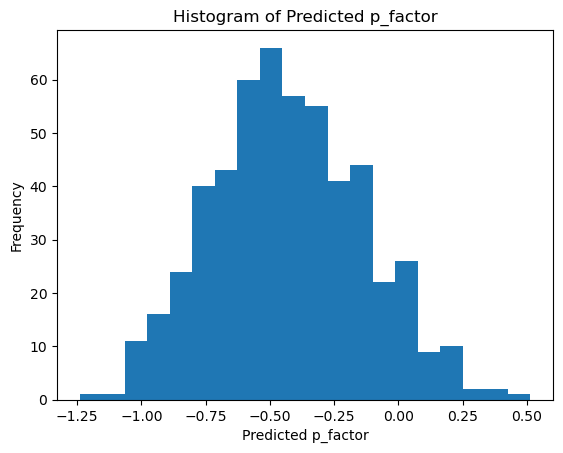

In [91]:
import matplotlib.pyplot as plt
plt.hist(p_factor_predictions, bins=20); plt.xlabel('Predicted p_factor'); plt.ylabel('Frequency'); plt.title('Histogram of Predicted p_factor'); plt.show()


<Axes: >

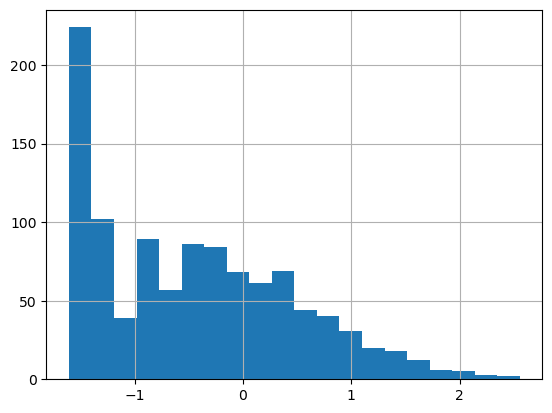

In [90]:
train_vars['p_factor'].dropna().hist(bins=20)


### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [34]:
test.loc[test_okrows, 'p_factor'] = p_factor_predictions

# test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test

,bankssts,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,frontalpole,fusiform,inferiorparietal,inferiortemporal,insula,...,handedness,participant_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group,is_train,parent_1_education_num,parent_2_education_num
1060,2869.0,1996.5,5606.5,3178.5,1711.5,1296.0,9608.5,16998.0,12939.0,7347.0,...,Right,7th Grade,-0.500367,0.097355,0.387355,-0.467807,113,False,2.0,2.0
1061,3894.5,2660.0,8166.5,3630.0,2214.0,1423.5,11580.0,18705.0,13208.0,9020.0,...,Ambidextrous,1st Grade,-0.770296,0.699062,-0.781881,-0.982040,3,False,2.0,1.0
1062,2153.0,1811.0,5324.5,2733.0,1758.5,832.5,7493.5,11599.5,8961.5,5551.5,...,Right,12th Grade,-0.105171,0.495947,0.806481,-0.832210,1,False,3.0,2.0
1063,2365.5,2311.0,8371.5,5063.5,1057.5,1074.0,8960.0,14251.0,9601.5,8116.0,...,Right,2nd Grade,-0.605512,-0.334835,1.277773,0.161110,4,False,3.0,2.0
1064,2939.5,2225.5,5760.0,3688.0,2564.0,1420.5,11359.0,16603.5,12894.5,7888.5,...,Right,10th Grade,-0.405926,1.027404,-0.490472,2.014568,1,False,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2818.0,2434.0,7905.5,3037.5,1530.0,1203.5,11331.5,16562.0,14074.0,8191.5,...,Right,5th Grade,-0.558931,-0.148520,0.556444,0.024228,1,False,3.0,2.0
1588,1953.0,1437.5,6530.5,2993.0,1375.5,1181.0,7801.0,10156.5,6854.5,5669.0,...,Right,11th Grade,-0.240928,0.993806,1.578177,-0.373470,1,False,2.0,2.0
1589,3328.0,2511.5,9031.5,4452.5,3253.5,985.0,11818.5,16678.5,16417.5,7624.0,...,Right,4th Grade,-0.499220,-1.026645,-0.582212,1.333857,1,False,1.0,2.0
1590,3221.5,1409.5,7820.0,3156.0,1878.0,1154.0,9247.5,15685.5,11532.0,8183.5,...,Right,5th Grade,NaN,0.360029,-0.515655,1.509584,114,False,1.0,NaN


We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

In [36]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'groupname103'  # Change this to be your group name!

test.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

In [37]:
pwd !

'/home/jovyan/week1-project-template'

Once the tsv file has been saved, you can commit it to your GitHub repository
then push it and submit a pull request to the `results` branch of the original
repository!